# Librairies de machine learning

In [ ]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Voir aussi [Awesome Machine Learning](https://github.com/josephmisiti/awesome-machine-learning#python).

## Classiques

### scikit-learn

[scikit-learn](http://scikit-learn.org/stable/) a défini le standard de machine learning en Python.

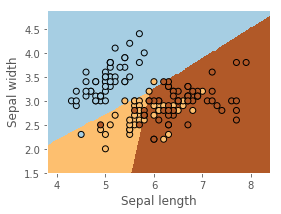

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

logreg = linear_model.LogisticRegression()
logreg.fit(X, Y)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[:, 1], c=Y, lw=1, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

### XGBoost

[XGBoost](https://github.com/dmlc/xgboost) gagne beaucoup de compétition sur [Kaggle](https://www.kaggle.com/).

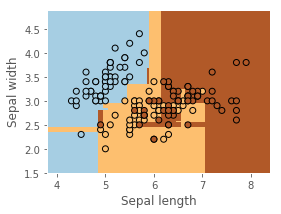

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from xgboost import XGBClassifier

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

logreg = XGBClassifier()
logreg.fit(X, Y)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[:, 1], c=Y, lw=1, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

### statsmodels

[statsmodels](http://statsmodels.sourceforge.net/) pour tout ce qui concerne la machine learning linéaire et les séries temporelles. *statsmodels* s'applique facile sur des dataframes dont l'index est de type [DatetimeIndex](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DatetimeIndex.html).

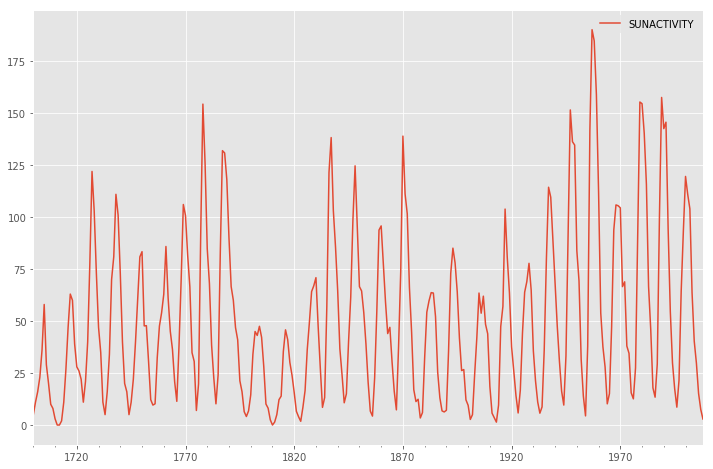

In [ ]:
import numpy as np
from scipy import stats
import pandas
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from datetime import datetime

dta = sm.datasets.sunspots.load_pandas().data
dta = dta.set_index(pandas.DatetimeIndex(dta["YEAR"].apply(lambda d: datetime(year=int(d), month=1, day=1))))
del dta["YEAR"]
dta.plot(figsize=(12,8))

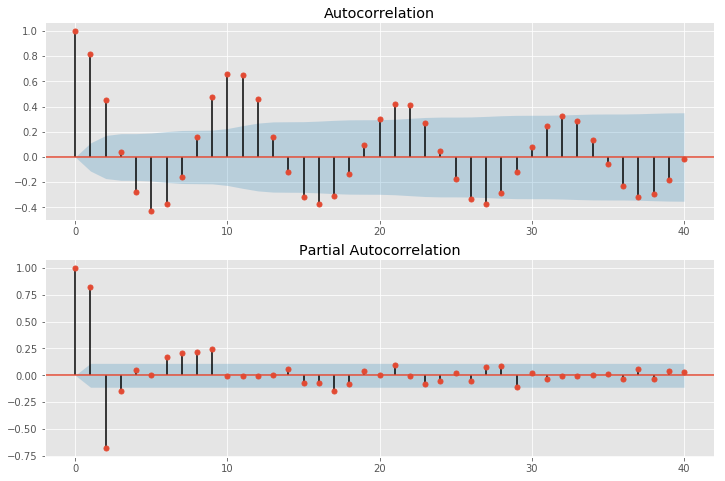

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)

In [ ]:
arma_mod20 = sm.tsa.ARMA(dta, (2,0)).fit()
arma_mod20.params

const                49.659555
ar.L1.SUNACTIVITY     1.390656
ar.L2.SUNACTIVITY    -0.688571
dtype: float64

In [ ]:
arma_mod30 = sm.tsa.ARMA(dta, (3,0)).fit()
arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic

(2622.636338066196, 2637.5697031737868, 2628.606725911442)

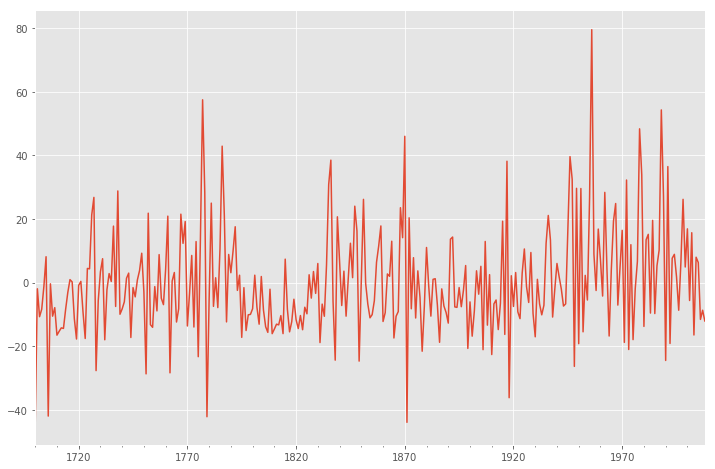

In [ ]:
import pandas
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod30.resid.plot(ax=ax)

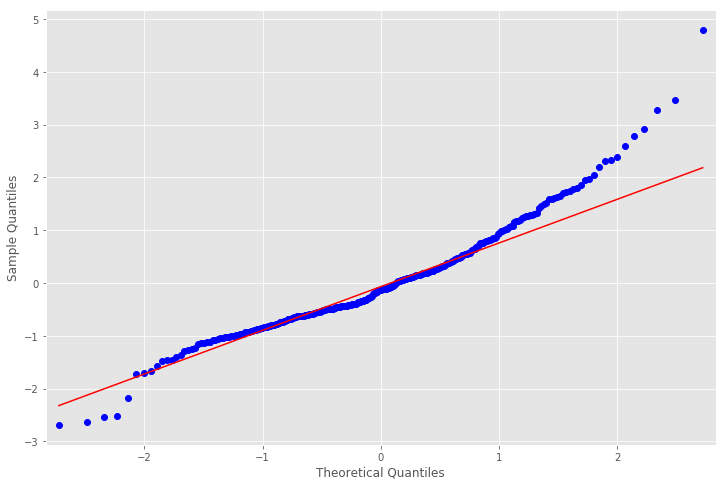

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(arma_mod30.resid, line='q', ax=ax, fit=True)

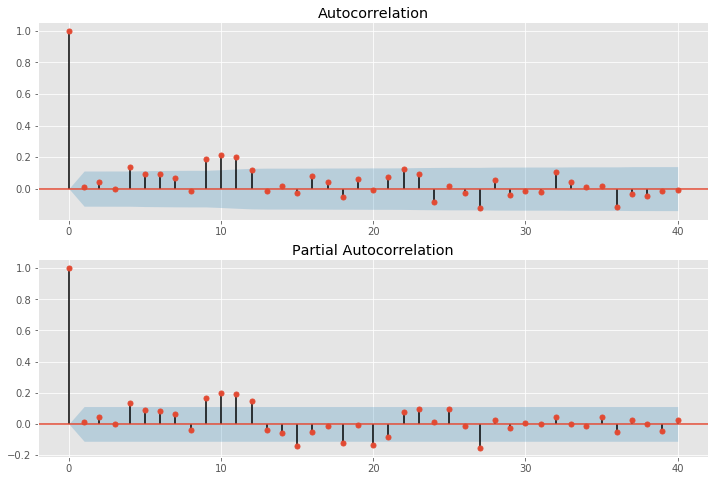

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arma_mod30.resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arma_mod30.resid, lags=40, ax=ax2)

c:\python35_x64\lib\site-packages\statsmodels\tsa\arima_model.py:1724: FutureWarning: TimeSeries is deprecated. Please use Series
  forecast = TimeSeries(forecast, index=self.data.predict_dates)


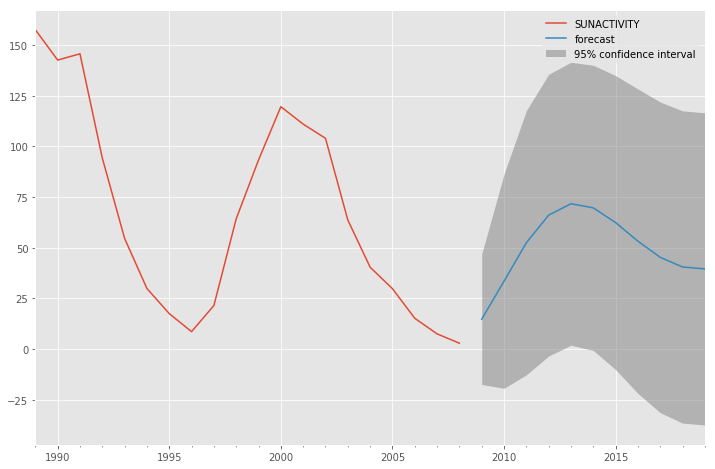

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = dta[-20:].plot(ax=ax)
fig = arma_mod30.plot_predict(len(dta), len(dta)+10 ,
                              dynamic=True, ax=ax, plot_insample=False)

### Vowpalwabbit

[vowpalwabbit](https://pypi.python.org/pypi/vowpalwabbit), [github](https://github.com/JohnLangford/vowpal_wabbit)

Compiler la librairie sous Windows prend un peu de temps. La librairie implémente quelques algorithmes de façons très efficace, notamment la régression logistique. La documentation n'est pas la plus réussie.

* [Contextual Bandit](https://github.com/JohnLangford/vowpal_wabbit/wiki/Contextual-Bandit-Example)
* [Truncated Gradient Descent](https://github.com/JohnLangford/vowpal_wabbit/wiki/Truncated-gradient-descent-example)

### H20

[H20](https://github.com/h2oai/h2o-3), [Python documentation](http://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/frame.html).

La librairie et écrite en java et fonctionne sur plusieurs plateforme (Python, R, Java, Spark). En contrepartie, elle implémente ses propres dataframes.

## A suivre

### lightning

[lightning](https://github.com/scikit-learn-contrib/lightning)

Large scale learning, utilise des itérateurs sur les données.

Prometteur mais le module porte un nom déjà pris.

### mlxtend

[mlxtend](https://github.com/rasbt/mlxtend)

### Brainstorm

[brainstorm](http://brainstorm.readthedocs.io/)

### MDP

[MDP](http://mdp-toolkit.sourceforge.net/)

### pyMVPA

### polylearn

[polylearn](https://github.com/scikit-learn-contrib/polylearn)

A library for factorization machines and polynomial networks for classification and regression in Python.

### nimfa

[nimfa](http://nimfa.biolab.si/)